<a href="https://colab.research.google.com/github/sachin-vanveru/ML/blob/main/LeadScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

     |████████████████████████████████| 301 kB 11.9 MB/s 
     |████████████████████████████████| 6.8 MB 44.6 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 261 kB 34.5 MB/s 
     |████████████████████████████████| 114 kB 50.0 MB/s 
     |████████████████████████████████| 1.3 MB 44.4 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 2.0 MB 44.4 MB/s 
     |████████████████████████████████| 15.6 MB 41.4 MB/s 
     |████████████████████████████████| 167 kB 47.7 MB/s 
     |████████████████████████████████| 1.7 MB 47.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 675 kB 45.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 636 kB 49.6 MB/s 
     |██████████████████

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np

In [3]:
lead=pd.read_csv('Lead Scoring.csv')

In [4]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9218 entries, 0 to 9217
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9218 non-null   object 
 1   Lead Number                                    9218 non-null   int64  
 2   Lead Origin                                    9218 non-null   object 
 3   Lead Source                                    9182 non-null   object 
 4   Do Not Email                                   9218 non-null   object 
 5   Do Not Call                                    9218 non-null   object 
 6   Converted                                      9218 non-null   int64  
 7   TotalVisits                                    9081 non-null   float64
 8   Total Time Spent on Website                    9218 non-null   int64  
 9   Page Views Per Visit                           9081 

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9218.000000,9218.000000,9081.000000,9218.000000,9081.000000,5003.000000,5003.000000
mean,617277.949230,0.385225,3.441691,486.953786,2.361228,14.307216,16.336198
std,23361.989631,0.486675,4.857409,547.547381,2.161990,1.387441,1.806654
min,579786.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596574.750000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615572.500000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637413.250000,1.000000,5.000000,933.750000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead.shape

(9218, 37)

In [8]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2460
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2688
What matters most to you in choosing a course    2707
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
lead_copy=lead.copy()
lead_copy.dropna(axis=0, inplace=True)

In [10]:
lead_copy['Converted'].unique()

array([1, 0])

##Label Encoding of Independent variable('Converted')
1 : 'Yes', 0 : 'No'

In [11]:
from sklearn.preprocessing import LabelEncoder
lead_copy['Converted'] = LabelEncoder().fit_transform(lead_copy['Converted'])

In [12]:
lead_copy.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,No,1,8.0,1351,8.0,Email Opened,India,Travel and Tourism,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Other Metro Cities,02.Medium,02.Medium,15.0,14.0,No,Yes,Email Opened


In [51]:
lead_copy['Country'].value_counts()

India                   1842
United States             23
United Arab Emirates      15
Singapore                 11
Saudi Arabia               7
Hong Kong                  5
Bahrain                    4
France                     3
Australia                  3
United Kingdom             3
Kuwait                     2
Qatar                      2
Ghana                      1
Netherlands                1
Sweden                     1
Germany                    1
Italy                      1
Denmark                    1
Canada                     1
Indonesia                  1
South Africa               1
China                      1
Name: Country, dtype: int64

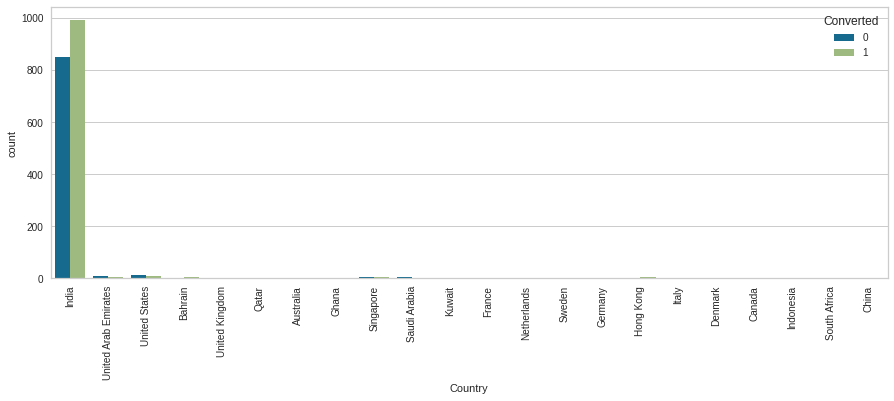

In [44]:

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_copy.Country, hue=lead_copy.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

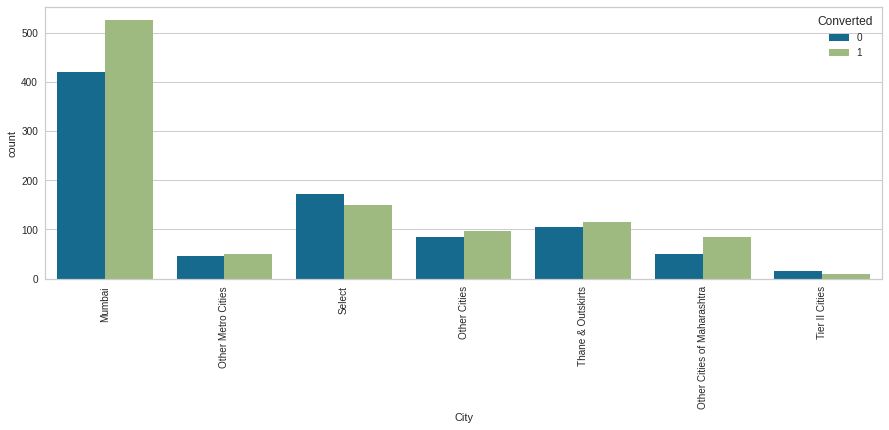

In [46]:


plt.figure(figsize=(15,5))
s1=sns.countplot(lead_copy.City, hue=lead_copy.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [50]:
lead_copy['City'].value_counts(dropna=False)

Mumbai                         945
Select                         323
Thane & Outskirts              222
Other Cities                   181
Other Cities of Maharashtra    136
Other Metro Cities              97
Tier II Cities                  26
Name: City, dtype: int64

In [49]:
lead_copy['Tags'].value_counts(dropna=False)

Will revert after reading the email                  841
Ringing                                              312
Already a student                                    132
Interested in other courses                          131
Closed by Horizzon                                    97
switched off                                          86
Busy                                                  82
Not doing further education                           59
Graduation in progress                                40
Interested  in full time MBA                          36
Lost to EINS                                          34
invalid number                                        18
wrong number given                                    13
number not provided                                   12
Diploma holder (Not Eligible)                         12
opp hangup                                            12
Still Thinking                                         4
In confusion whether part time 

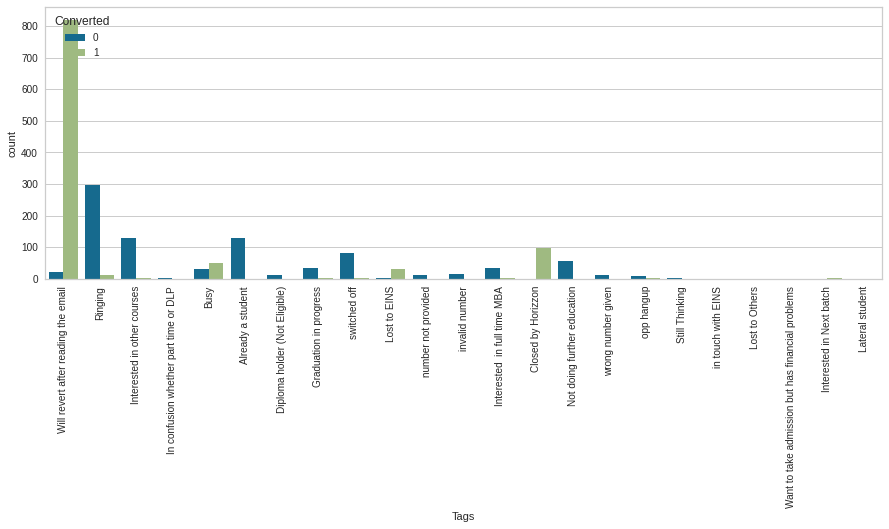

In [48]:

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_copy.Tags, hue=lead_copy.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##Plot graph

In [13]:
import plotly.express as px

fig = px.scatter(x=lead_copy['Total Time Spent on Website'], y=lead_copy['Asymmetrique Activity Score'], 
                 color = lead_copy['Converted'], template = 'plotly_white', 
                 facet_col = lead_copy['Lead Origin'], facet_row = lead_copy['Do Not Email'],
                 title = 'Lead Conversion by Total time spent on Website, Activity Score and Lead Origin',
                 labels = {'x' : 'Total Time Spent on Website', 'y' : 'Activity Score'})
                
fig.show()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


##SETUP ENVIRONMENT

In [14]:
from pycaret.classification import *
s=setup(lead,target='Converted',ignore_features=['Prospect ID', 'Lead Number'])

,Description,Value
0,session_id,5652
1,Target,Converted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9218, 37)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,31
8,Ordinal Features,False
9,High Cardinality Features,False


## Model Training and Selection

In [15]:
bm=compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9425,0.9826,0.8962,0.9512,0.9228,0.8771,0.8781,1.465
lightgbm,Light Gradient Boosting Machine,0.9496,0.9825,0.9265,0.9414,0.9338,0.8932,0.8933,0.228
lr,Logistic Regression,0.9426,0.9811,0.9042,0.9440,0.9236,0.8777,0.8784,1.847
rf,Random Forest Classifier,0.9451,0.9798,0.9139,0.9414,0.9274,0.8833,0.8836,0.958
ada,Ada Boost Classifier,0.9400,0.9792,0.8974,0.9436,0.9198,0.8719,0.8728,0.668
lda,Linear Discriminant Analysis,0.9343,0.9788,0.8885,0.9370,0.9120,0.8596,0.8605,0.336
et,Extra Trees Classifier,0.9457,0.9779,0.9147,0.9422,0.9282,0.8846,0.8850,1.047
nb,Naive Bayes,0.8630,0.9358,0.9042,0.7765,0.8352,0.7192,0.7257,0.044
dt,Decision Tree Classifier,0.9236,0.9217,0.9030,0.8986,0.9007,0.8386,0.8387,0.092
knn,K Neighbors Classifier,0.7971,0.8526,0.7224,0.7430,0.7321,0.5690,0.5695,0.367


In [16]:
print(bm)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5652, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


##AUC-ROC Plot

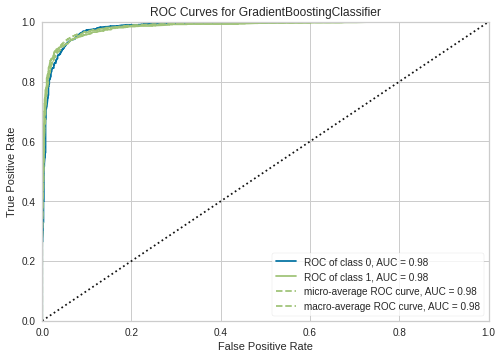

In [17]:
plot_model(bm, plot = 'auc')

##Feature Importance Plot


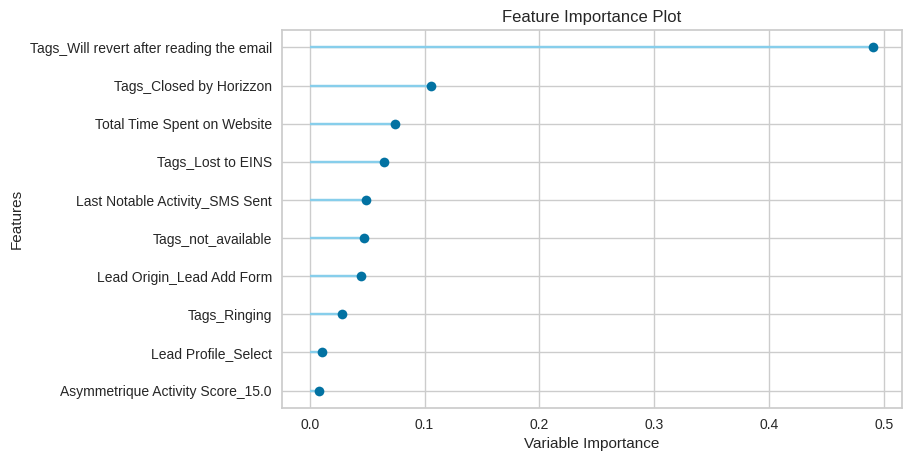

In [18]:
plot_model(bm,plot='feature')

##Confusion Matrix

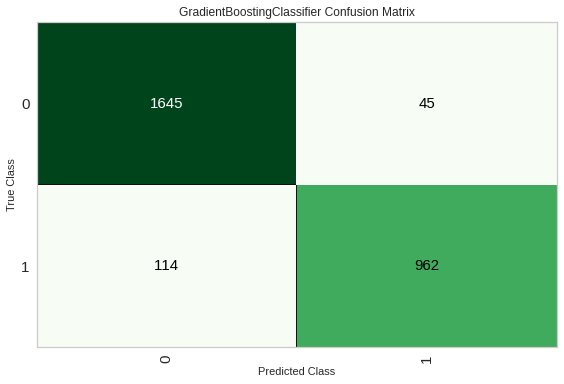

In [19]:
# Confusion Matrix
plot_model(bm, plot = 'confusion_matrix')

In [20]:
evaluate_model(bm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
unseendata=pd.read_csv('TEST.csv')


In [27]:
unseendata

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,eee466be-b98c-4126-9220-fc406093b9ce,579784,Landing Page Submission,Google,Yes,No,1,149,1.00,Email Bounced,India,Human Resource Management,Student of SomeSchool,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,01.High,13.0,18.0,No,No,Modified
1,9c970d5c-2748-4f61-90a6-eafd9ad5a242,579778,Landing Page Submission,Direct Traffic,No,No,6,1389,6.00,Email Opened,India,Marketing Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Metro Cities,02.Medium,01.High,15.0,18.0,No,Yes,Email Opened
2,679ab5f9-0f85-4f16-a903-821ecd82e731,579769,Landing Page Submission,Direct Traffic,No,No,5,20,2.50,SMS Sent,India,Finance Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,NaN,No,No,Potential Lead,Thane & Outskirts,02.Medium,01.High,13.0,19.0,No,Yes,Modified
3,b92509cd-7f4c-414e-a8af-eb9cf0c89da7,579767,Landing Page Submission,Google,No,No,4,1347,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Might be,No,No,Select,Mumbai,NaN,NaN,NaN,NaN,No,Yes,SMS Sent
4,68e53bdc-b66d-48ef-8592-973a8a65377e,579764,API,Google,No,No,6,228,6.00,SMS Sent,India,Retail Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Other Cities,02.Medium,02.Medium,15.0,16.0,No,No,Modified
5,c55de92b-9295-40e1-90e8-a628c349c292,579755,API,Organic Search,No,No,7,142,7.00,Email Opened,India,Operations Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Not doing further education,Worst,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,18.0,No,Yes,Modified
6,18930f11-41cd-42d1-96d7-34ac870174cb,579753,Landing Page Submission,Google,No,No,4,455,4.00,Form Submitted on Website,India,Operations Management,Advertisements,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,NaN,No,No,Potential Lead,Mumbai,03.Low,01.High,12.0,20.0,No,No,Modified
7,787ab5f4-6f09-41c0-b083-55521ca23f8a,579744,Landing Page Submission,Direct Traffic,Yes,No,2,74,2.00,Email Bounced,Saudi Arabia,International Business,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Not Sure,No,No,Potential Lead,Mumbai,03.Low,01.High,12.0,20.0,No,Yes,Modified
8,c3bb1471-53d5-4244-b2e5-4bbb543835c1,579735,API,Olark Chat,No,No,0,0,0.00,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Select,01.High,02.Medium,16.0,15.0,No,No,Modified
9,ac95586a-506a-4222-9967-17dfe9f82524,579728,Landing Page Submission,Google,No,No,5,1283,1.67,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,20.0,No,No,Email Opened


In [28]:
lead_pred=predict_model(bm,data=unseendata)

In [33]:
lead_pred.to_csv('/content/sample_data/predictedValue.csv')